<h1>Content<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Conclusions-by-step-1:" data-toc-modified-id="Conclusions-by-step-1:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusions by step 1:</a></span></li></ul></li><li><span><a href="#Research-tasks" data-toc-modified-id="Research-tasks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Research tasks</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#k-Nearest-Neighbors" data-toc-modified-id="k-Nearest-Neighbors-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>k Nearest Neighbors</a></span></li></ul></li><li><span><a href="#How-to-Combat-Imbalanced-Classes" data-toc-modified-id="How-to-Combat-Imbalanced-Classes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>How to Combat Imbalanced Classes</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#k-Nearest-Neighbors" data-toc-modified-id="k-Nearest-Neighbors-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>k Nearest Neighbors</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#k-Nearest-Neighbors" data-toc-modified-id="k-Nearest-Neighbors-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>k Nearest Neighbors</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Conclusions-by-step-3" data-toc-modified-id="Conclusions-by-step-3-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Conclusions by step 3</a></span></li></ul></li><li><span><a href="#Testing-models" data-toc-modified-id="Testing-models"><span class="toc-item-num">4&nbsp;&nbsp;</span>Testing models</a></span></li><li><span><a href="#Checklist-readiness-of-the-project" data-toc-modified-id="Checklist-readiness-of-the-project-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Checklist readiness of the project</a></span></li><li><span><a href="#General-output" data-toc-modified-id="General-output-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>General output</a></span></li></ul></div>

# Customer Churn

Customers began to leave Beta Bank. Every month. A little, but noticeable. Bank marketers have calculated that it is cheaper to retain current customers than to attract new ones.

It is necessary to predict whether the client will leave the bank in the near future or not. I am presented with historical data on the behavior of customers and the termination of contracts with the bank. 

It is necessary to build a model with an extremely large value of *F1*-measures. To pass the project successfully, you need to bring the metric to 0.59. 

Additionally measure *AUC-ROC*, compare its value with *F1*-measure.

Data source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Data preparation

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import ShuffleSplit 
from sklearn.utils import shuffle

from sklearn.neighbors import KNeighborsClassifier
from joblib import dump
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score 
from sklearn.metrics import recall_score, precision_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder  

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Churn.csv')

Let's look at our dataset

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2317,2318,15627212,Smith,630,France,Female,36,NaN,110414.48,1,1,1,48984.95,0
4245,4246,15569446,Tu,732,France,Female,34,8.0,122338.43,2,1,0,187985.85,0
5658,5659,15814430,Ma,747,Spain,Male,41,9.0,0.00,1,1,0,32430.94,1
6972,6973,15706232,Niu,595,France,Male,52,9.0,0.00,1,1,1,106340.66,1
2584,2585,15754537,Ko,748,France,Male,40,0.0,0.00,1,0,0,60416.76,0
924,925,15658485,Heath,785,France,Female,34,NaN,70302.48,1,1,1,68600.36,0
207,208,15679531,Collins,618,France,Male,34,5.0,134954.53,1,1,1,151954.39,0
4830,4831,15620758,Martel,660,Spain,Male,30,4.0,0.00,2,1,0,129149.06,0
1633,1634,15755868,Farmer,562,France,Male,35,7.0,0.00,1,0,0,48869.67,0
4044,4045,15607142,Parkin,658,France,Male,32,8.0,0.00,1,1,1,80410.68,0


**Features**
- RowNumber — index of the row in the data
- CustomerID — unique identifier of the customer
- Surname — surname
- CreditScore — credit rating
- Geography — country of residence
- Gender — gender
- Age — age
- Tenure — how many years has a person been a customer of the bank
- Balance — account balance
- NumOfProducts — the number of bank products used by the customer
- HasCrCard — availability of a credit card
- IsActiveMember — client activity
- EstimatedSalary — estimated salary

**Target**
- Exited — the fact of the client's churn


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [7]:
df.shape

(10000, 14)

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


After a preliminary acquaintance with the data, we see a large number of omissions in the 'Tenure' feature. Let's take a closer look at this data

In [9]:
df[df['Tenure'].isnull()].sample(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4918,4919,15796074,Bruno,717,France,Female,36,NaN,99472.76,2,1,0,94274.72,1
6950,6951,15667392,L?,652,Spain,Female,38,NaN,123081.84,2,1,1,188657.97,0
9485,9486,15656319,Toscano,850,Spain,Male,37,NaN,88141.10,1,1,0,109659.12,0
9938,9939,15593496,Korovin,526,Spain,Female,36,NaN,91132.18,1,0,0,58111.71,0
9822,9823,15781298,Hughes,808,Germany,Male,39,NaN,124216.93,1,0,1,171442.36,0
6497,6498,15793688,Bancks,669,France,Male,50,NaN,201009.64,1,1,0,158032.50,1
3608,3609,15601873,Bull,677,France,Female,36,NaN,0.00,1,1,0,47318.75,0
4989,4990,15602851,Ozioma,629,France,Male,40,NaN,0.00,1,1,0,106.67,0
8436,8437,15617538,Nwankwo,834,Spain,Male,40,NaN,0.00,2,0,0,45038.74,0
8608,8609,15649060,Chien,727,Germany,Female,31,NaN,82729.47,2,1,0,60212.51,0


array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>]],
      dtype=object)

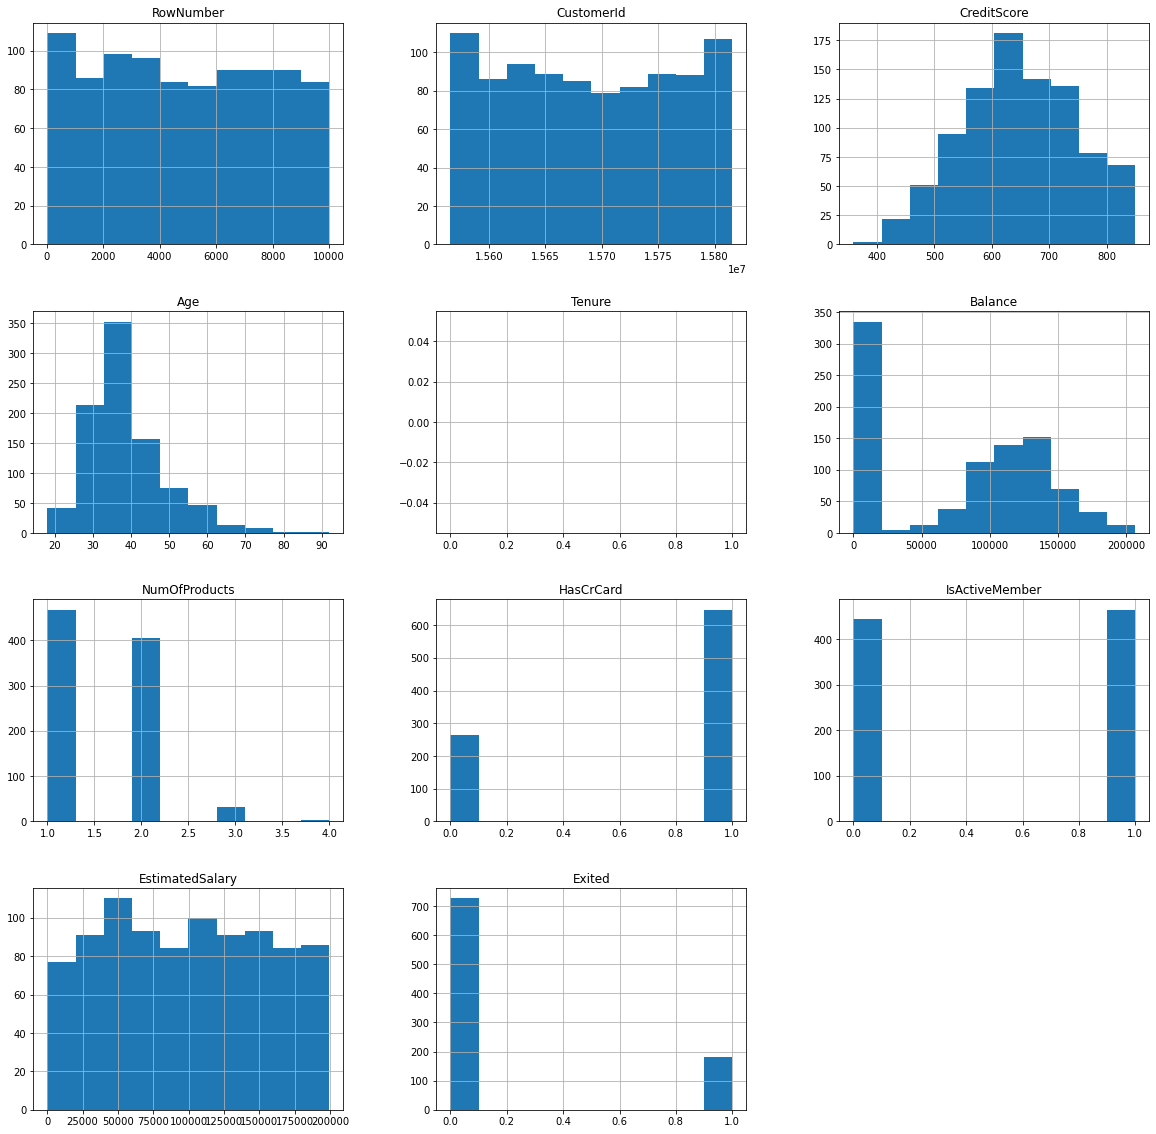

In [10]:
df[df['Tenure'].isnull()].hist(figsize=(20,20))

Let's look at the correlation of data in this dataset

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

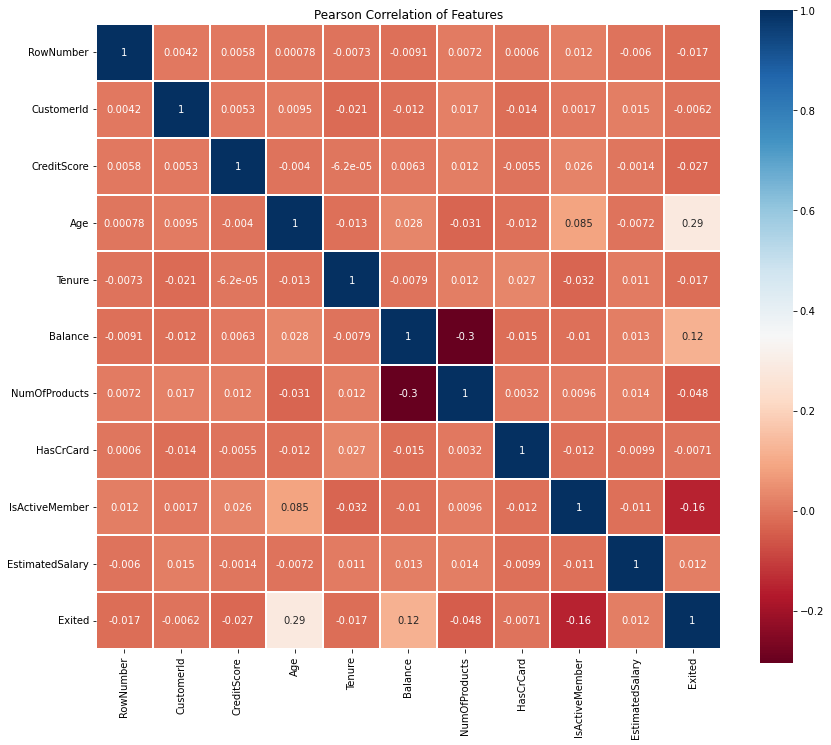

In [11]:
colormap=plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features')
sns.heatmap(df.corr(),
            linewidths=0.1, vmax=1.0,
            square=True, annot=True, cmap=colormap)

After a preliminary acquaintance with the data, it is clear that it is necessary to decide what to do with the gaps in the column with the 'Tenure' feature. On the one hand, throwing out about 10% of the data is a lot, however, on the other hand, it is obvious that this feature almost does not correlate with others, and besides, by putting a "stub" we will complicate the "learning process" of our model in the future, so we will rewrite the dataset without missing values; we will remove the features that do not affect the target attribute in our task: the client has churn or not, and also change the data type in the 'tenure' column to 'int', because only integer values are represented in it

In [12]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True, axis=1)

df['Tenure'] = df['Tenure'].fillna(np.random.choice(df['Tenure'].dropna()))
df['Tenure']=df['Tenure'].astype('int')


In [13]:
df.columns = df.columns.str.lower()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int32  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int32(1), int64(6), object(2)
memory usage: 820.4+ KB


In [15]:
df.head(10)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [16]:


df_train, df_valid = train_test_split(df, test_size=0.40, random_state=1410, stratify=df['exited'])
df_valid, df_test = train_test_split(df_valid,test_size = 0.5, random_state=1410, stratify=df_valid['exited'])
print('Training sample size:', df_train.shape[0])
print('Validation sample size:', df_valid.shape[0])
print('Testing sample size:',df_test.shape[0])

Training sample size: 6000
Validation sample size: 2000
Testing sample size: 2000


In [17]:

df_train_ohe=pd.get_dummies(df_train,drop_first=True)
df_train_ohe.head()


,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
872,722,35,2,163943.89,2,1,1,15068.18,0,0,0,0
3611,746,21,8,166883.07,2,0,1,194563.65,0,0,0,0
8137,410,33,6,125789.69,1,0,0,66333.56,1,0,0,1
4027,662,39,5,139822.11,2,1,1,146219.90,0,1,0,1
3741,738,29,9,139106.19,1,1,0,141872.05,1,1,0,0


In [18]:
df_valid_ohe=pd.get_dummies(df_valid,drop_first=True)
df_valid_ohe.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
5378,606,27,5,130274.26,2,1,0,147533.09,0,1,0,1
3226,603,35,1,105346.03,2,1,1,130379.50,0,1,0,1
9046,630,23,4,137964.51,1,0,1,174570.55,0,1,0,0
9140,449,21,7,0.00,2,0,0,175743.92,0,0,0,0
8730,764,30,5,0.00,2,0,1,105155.66,0,0,0,1


In [19]:
df_test_ohe=pd.get_dummies(df_test,drop_first=True)
df_test_ohe.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
1558,571,35,1,104783.81,2,0,1,178512.52,0,0,0,0
9460,744,35,7,0.00,2,1,1,43036.60,0,0,1,1
4527,705,38,1,189443.72,1,0,1,106648.58,0,0,0,1
6457,615,51,6,81818.49,1,1,1,169149.38,0,0,1,1
2044,487,45,2,0.00,2,1,0,77475.73,0,0,0,1


In [20]:


features_train = df_train_ohe.drop(['exited'], axis=1)

target_train = df_train_ohe['exited']



features_valid = df_valid_ohe.drop(['exited'], axis=1)

target_valid =  df_valid_ohe['exited'] 


features_test = df_test_ohe.drop(['exited'], axis=1)

target_test = df_test_ohe['exited']

In [21]:
#Scaling of features
pd.options.mode.chained_assignment = None
numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


### Conclusions by step 1:

After getting acquainted with the dataset , the following problems were identified and solved:
- **missing values** in the 'tenure' attribute. Perhaps this is due to an error when downloading the dataset. Since there is no way to find out whether to download or fill in these values again, it was decided not to take this data (about 9%) into account for building the model;
- **uniformity in the spelling of features**: all names are given to lowercase spelling;
- **changed data types**: 'tenure' is reduced to an integer value
- **OHE**: categorical features were transformed into quantitative ones using the OHE technique (this affected the 'gender' 'geography' columns)
- the data is divided into training, validation and test samples 
- variables have been created for the features and the target attribute
- standardized numerical features

## Task research

We investigate the ratio of classes in the target class. We study the models first without taking into account this ratio, and then with it.

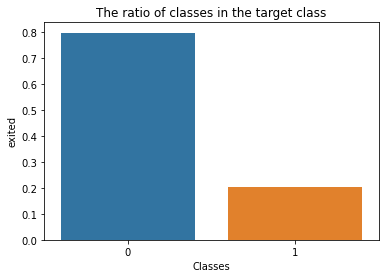

In [22]:
class_frequency = df['exited'].value_counts(normalize=2)
sns.barplot(x=df['exited'].value_counts().index, y=df['exited'].value_counts(normalize=2))
plt.title("The ratio of classes in the target class")
plt.xlabel("Classes")
plt.show()  


### Logistic regression

In [23]:
model = LogisticRegression(random_state=1410, max_iter=100) 
model.fit(features_train,target_train) 
predictions = model.predict(features_valid)
recall = recall_score(target_valid, predictions) #the quality of the model in the validation sample
precision=precision_score(target_valid, predictions)
f1=f1_score(target_valid,predictions)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print("AUC_ROC:", auc_roc)        
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)

AUC_ROC: 0.769305515068227
recall: 0.20147420147420148
precision: 0.5774647887323944
f1: 0.2987249544626594


### Decision Tree

In [24]:
best_model = None

best_result = 0

for depth in range(1, 20):

    model = DecisionTreeClassifier(random_state=1410, max_depth=depth) 

    model.fit(features_train, target_train) 

    predictions= model.predict(features_valid) 

    f1=f1_score(target_valid,predictions)
    if f1 > best_result:
        best_model = model 
        best_result = f1
        recall = recall_score(target_valid, predictions) 
        precision=precision_score(target_valid, predictions)

        
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print("AUC_ROC:", auc_roc)
print("The best model:", best_model)
print("recall:", recall)
print("precision:", precision)
print("f1:", best_result)

AUC_ROC: 0.6942805671619231
The best model: DecisionTreeClassifier(max_depth=6, random_state=1410)
recall: 0.42997542997543
precision: 0.7675438596491229
f1: 0.5511811023622047


### Random Forest

In [25]:
best_model = None
best_result = 0
for est in range(1, 200,10):
    model = RandomForestClassifier(random_state=1410, n_estimators=est) 
    model.fit(features_train,target_train) 
    predictions = model.predict(features_valid)
    f1=f1_score(target_valid,predictions)
    if f1 > best_result:
        best_model = model
        best_result = f1
        recall = recall_score(target_valid, predictions) 
        precision=precision_score(target_valid, predictions)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print("AUC_ROC:", auc_roc)        

print("The best model:", best_model)
print("recall:", recall)
print("precision:", precision)
print("f1:", best_result)



AUC_ROC: 0.8582665870801465
The best model: RandomForestClassifier(n_estimators=191, random_state=1410)
recall: 0.4864864864864865
precision: 0.7857142857142857
f1: 0.6009104704097117


### k Nearest Neighbors

In [26]:

best_model = None
best_result = 0
for n in range(1, 30, 5):
    model = KNeighborsClassifier(n_neighbors = n)# Fit the classifier to the data
    model.fit(features_train,target_train) 
    predictions = model.predict(features_valid)
    f1=f1_score(target_valid,predictions) 
    if f1 > best_result:
        best_model = model     
        best_result = f1 
        recall = recall_score(target_valid, predictions) 
        precision=precision_score(target_valid, predictions)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print("AUC_ROC:", auc_roc)        
print("F1 of the best model", best_result)
print("The best model", best_model)
print("recall:", recall)
print("precision:", precision)

AUC_ROC: 0.8358875053790308
F1 of the best model 0.5341812400635929
The best model KNeighborsClassifier(n_neighbors=11)
recall: 0.41277641277641275
precision: 0.7567567567567568


We trained 4 models, looked at metrics for them. The F1 measure achieved our goal in the case of logistic regression and in a random forest. Let's try to give objects of a rare class more weight

## How to Combate Imbalanced Classes

### Logistic regression

In [27]:
model = LogisticRegression(random_state=1410, solver='liblinear', class_weight='balanced' )
model = LogisticRegression(random_state=1410, max_iter=100) 
model.fit(features_train,target_train) 
predictions = model.predict(features_valid)
recall = recall_score(target_valid, predictions) 
precision=precision_score(target_valid, predictions)
f1=f1_score(target_valid,predictions)
    

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print("AUC_ROC:", auc_roc)        
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)

AUC_ROC: 0.769305515068227
recall: 0.20147420147420148
precision: 0.5774647887323944
f1: 0.2987249544626594


Bad model

In [28]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=1410)
    return features_upsampled, target_upsampled
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

### Logistic regression

In [29]:
model = LogisticRegression(solver='liblinear', random_state=1410)
model.fit(features_upsampled, target_upsampled) 
predictions = model.predict(features_valid)
recall = recall_score(target_valid, predictions) 
precision=precision_score(target_valid, predictions)
f1=f1_score(target_valid,predictions)
    
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print("AUC_ROC:", auc_roc)
        
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)


AUC_ROC: 0.7735485871079091
recall: 0.6928746928746928
precision: 0.38472032742155526
f1: 0.4947368421052632


### Decision Tree

In [30]:
best_model = None

best_result = 0

for depth in range(1, 20):

    model = DecisionTreeClassifier(random_state=1410, max_depth=depth) 

    model.fit(features_upsampled, target_upsampled)  

    predictions= model.predict(features_valid) 

    f1=f1_score(target_valid,predictions)
    if f1 > best_result:
        best_model = model # сохраните наилучшую модель
        best_result = f1
        recall = recall_score(target_valid, predictions) 
        precision=precision_score(target_valid, predictions)

        
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print("AUC_ROC:", auc_roc)
print("The best model:", best_model)
print("recall:", recall)
print("precision:", precision)
print("f1:", best_result)

AUC_ROC: 0.686169991254737
The best model: DecisionTreeClassifier(max_depth=7, random_state=1410)
recall: 0.7493857493857494
precision: 0.46003016591251883
f1: 0.5700934579439252


### Random Forest

In [31]:
best_model = None
best_result = 0
for est in range(1, 200, 10):
    model = RandomForestClassifier(random_state=1410, n_estimators=est) 
    model.fit(features_upsampled, target_upsampled) 
    predictions = model.predict(features_valid)
    f1=f1_score(target_valid,predictions)
    if f1 > best_result:
        best_model = model 
        best_result = f1
        recall = recall_score(target_valid, predictions) 
        precision=precision_score(target_valid, predictions)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print("AUC_ROC:", auc_roc)        

print("The best model:", best_model)
print("recall:", recall)
print("precision:", precision)
print("f1:", best_result)

AUC_ROC: 0.8534721161839806
The best model: RandomForestClassifier(n_estimators=61, random_state=1410)
recall: 0.5700245700245701
precision: 0.6946107784431138
f1: 0.6261808367071525


### k Nearest Neighbors

In [32]:

best_model = None
best_result = 0
for n in range(1, 30, 5):
    model = KNeighborsClassifier(n_neighbors = n)# Fit the classifier to the data
    model.fit(features_upsampled, target_upsampled) 
    predictions = model.predict(features_valid)
    f1=f1_score(target_valid,predictions) 
    if f1 > best_result:
        best_model = model    
        best_result = f1   
        recall = recall_score(target_valid, predictions) 
        precision=precision_score(target_valid, predictions)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print("AUC_ROC:", auc_roc)        
print("F1:", best_result)
print("The best model:", best_model)
print("recall:", recall)
print("precision:", precision)

AUC_ROC: 0.8348571992639788
F1: 0.5828819068255688
The best model: KNeighborsClassifier(n_neighbors=16)
recall: 0.6609336609336609
precision: 0.5213178294573644


In [33]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=1410)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=1410)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=1410)
    return features_downsampled, target_downsampled
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [34]:
target_downsampled.value_counts()

1    1222
0    1194
Name: exited, dtype: int64

### Logistic regression

In [35]:

model = LogisticRegression(solver='liblinear', random_state=1410)
model.fit(features_downsampled, target_downsampled ) 
predictions = model.predict(features_valid)
recall = recall_score(target_valid, predictions) #  качество модели на валидационной выборке
precision=precision_score(target_valid, predictions)
f1=f1_score(target_valid,predictions)
    
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print("AUC_ROC:", auc_roc)
        
print("recall:", recall)
print("precision:", precision)
print("F1:", f1)



AUC_ROC: 0.773246281720858
recall: 0.6904176904176904
precision: 0.38865836791147995
F1: 0.49734513274336284


### k Nearest Neighbors)

In [36]:

best_model = None
best_result = 0
for n in range(1, 30,5):
    model = KNeighborsClassifier(n_neighbors = n)# Fit the classifier to the data
    model.fit(features_downsampled, target_downsampled )
    predictions = model.predict(features_valid)
    f1=f1_score(target_valid,predictions) 
    if f1 > best_result:
        best_model = model    
        best_result = f1   
        recall = recall_score(target_valid, predictions) 
        precision=precision_score(target_valid, predictions)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print("AUC_ROC:", auc_roc)        
print("F1:", best_result)
print("The best model:", best_model)
print("recall:", recall)
print("precision:", precision)

AUC_ROC: 0.836549955194023
F1: 0.5676767676767677
The best model: KNeighborsClassifier(n_neighbors=16)
recall: 0.6904176904176904
precision: 0.48198970840480276


### Random Forest

In [37]:
best_model = None
best_result = 0
for est in range(1, 200, 10):
    model = RandomForestClassifier(random_state=1410, n_estimators=est) 
    model.fit(features_downsampled, target_downsampled ) 
    predictions = model.predict(features_valid)
    f1=f1_score(target_valid,predictions)
    if f1 > best_result:
        best_model = model
        best_result = f1
        recall = recall_score(target_valid, predictions) 
        precision=precision_score(target_valid, predictions)

        
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print("AUC_ROC:", auc_roc)
print("The best model:", best_model)
print("recall:", recall)
print("precision:", precision)
print("f1:", best_result)

AUC_ROC: 0.8542726085098966
The best model: RandomForestClassifier(n_estimators=141, random_state=1410)
recall: 0.7567567567567568
precision: 0.5032679738562091
f1: 0.6045142296368989


### Decision Tree

In [38]:
best_model = None

best_result = 0

for depth in range(1, 20):

    model = DecisionTreeClassifier(random_state=1410, max_depth=depth) 

    model.fit(features_downsampled, target_downsampled )  

    predictions= model.predict(features_valid) 

    f1=f1_score(target_valid,predictions)
    if f1 > best_result:
        best_model = model 
        best_result = f1
        recall = recall_score(target_valid, predictions) 
        precision=precision_score(target_valid, predictions)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
        

print("The best model:", best_model)
print("recall:", recall)
print("precision:", precision)
print("F1:", best_result)
print("AUC_ROC:", auc_roc)


The best model: DecisionTreeClassifier(max_depth=6, random_state=1410)
recall: 0.7395577395577395
precision: 0.4862681744749596
F1: 0.5867446393762182
AUC_ROC: 0.7170691492725392


### Output by step 3

As a result of the analysis of various models of the class imbalance, the following 3 techniques were applied and consistently investigated:
- weighing classes, 
- upsampling 
- downsampling

Classification metrics were calculated for each of the models, including completeness, accuracy, F-1 measure and AUC-ROC.
Based on the task that was set within the framework of this study, taking into account the imbalance of classes, the following models approached the value of F1-measure = 0.59:
1) **Random forest** by means of the technique of increasing the sample at 91 trees.
The following metrics are achieved:
- AUC_ROC metric value: 0.8579234087708664
- Best model: RandomForestClassifier(n_estimators=91, random_state=1410)
- Completeness of the model (recall): 0.5724815724815725
- MODEL ACCURACY (PRECISION): 0.6934523809523809
- F1-MODEL MEASURE (F1): 0.6271870794078062

2) **Random forest** by means of the technique of reducing the sample at 91 trees.
The following metrics are achieved:

- AUC_ROC metric value: 0.8547923886906937
- Best model: RandomForestClassifier(n_estimators=91, random_state=1410)
- Completeness of the model (recall): 0.742014742014742
- Model accuracy (precision): 0.5
- F1-MODEL MEASURE (F1): 0.5974282888229476

On the test sample, we will check the first model, because there are more chances to get an F-1 measure than 0.59

## Testing models

In [39]:
model = RandomForestClassifier(random_state=1410, n_estimators=91)
model.fit(features_upsampled, target_upsampled) 
predictions = model.predict(features_test)

f1=f1_score(target_test,predictions)
recall = recall_score(target_test, predictions) 
precision=precision_score(target_test, predictions)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc=roc_auc_score(target_test,probabilities_one_test)


print("AUC_ROC:", auc_roc)        
print("recall:", recall)
print("precision:", precision)
print("F1:", f1)




AUC_ROC: 0.844213407724899
recall: 0.5563725490196079
precision: 0.6579710144927536
F1: 0.602921646746348


<Figure size 432x288 with 0 Axes>

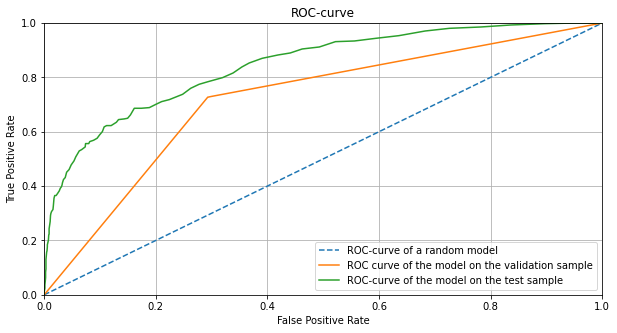

In [40]:

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
fpr_test, tpr_test, thresholds_test = roc_curve(target_test, probabilities_one_test) 

plt.figure()

plt.figure(figsize = [10, 5])
plt.plot([0, 1], [0, 1], linestyle='--', label = 'ROC-curve of a random model')
plt.plot(fpr, tpr, label = 'ROC curve of the model on the validation sample')
plt.plot(fpr_test, tpr_test, label = 'ROC-curve of the model on the test sample')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend()
plt.grid()


## Project readiness checklist

Put 'x' in the completed items. Then press Shift+Enter.


- [x] Jupiter Notebook is open
- [x] All code is executed without errors
- [x] The cells with the code are arranged in the order of execution
- [x] Step 1 is completed: data is prepared
- [x] Step 2 is completed: the problem is investigated
    - [x] The balance of classes
has been studied - [x] Models have been studied without taking into account the imbalance
- [x] Conclusions based on the results of the study have been written
- [x] Step 3 is completed: the imbalance is taken into account
    - [x] Several ways to combat the imbalance have been applied
- [x] Conclusions based on the results of the study have been written
- [x] Step 4 has been completed: testing has been performed
- [x] Managed to reach *F1*-measures at least 0.59
- [x] The *AUC-ROC metric has been investigated*

## General conclusion
As a result of the work performed, data for machine learning was prepared.

The use of direct OHE coding and scaling of the sample helped to achieve the required F1-measure indicator equal to **0.599** . This was possible when using the model:
**RandomForestClassifier and hyperparameter n_estimators=91**

After calculating the share of classes for data['exited'], it was noticeable that the imbalance between classes is almost 4 times and it is necessary to use additional tools to combat the imbalance.

We tried to increase the sample and use the same black models with different hyperparameters. As a result, achieve F1-measures with a maximum value in **0.627** . it was possible to obtain using only one model:

- **RandomForestClassifier and hyperparameter n_estimators=91**

After reducing the sample, it was not possible to get an F1 measure with a value satisfying the task, 0.5974.
- **RandomForestClassifier and hyperparameter n_estimators=91**

As a result, it was decided to test **RandomForestClassifier and hyperparameter n_estimators=91** with an increased sample.
The value of the F1 measure is also stored on the test sample.
In addition, the AUC-ROC metric, which shows how much our model differs from the random one, shows that our model performs better than the random model with a score of 0.5.
